In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy.linalg import inv

In [23]:
data = pd.read_csv('data/ex1data2.txt', sep=',',header=None)
data.columns = ["x1","x2","y"]

In [24]:
def compute_cost(x,theta,y):
    predicted_cost = np.dot(x,theta)
    diffrence = (predicted_cost - y)
    cost = np.sum(np.power(diffrence,2))
    return cost

In [25]:
def gradientDescent(x,y,theta,alpha,num_iterations):
    xx = []
    yy = []
    i = 0
    while i < num_iterations:
        predicted_cost = np.dot(x,theta)
        diffrence = (predicted_cost - y)
        denominator = x.shape[0]
        theta = theta - (alpha/denominator) * np.dot(x.T,diffrence)
        i = i+1
        if i%100 == 0:
            print("Cost for"+str(i)+"="+str(compute_cost(x,theta,y)))
        xx.append(i)
        yy.append(compute_cost(x,theta,y))
    plt.plot(xx,yy)
    plt.show()
    return theta

In [26]:
x = data[['x1','x2']].values
y = data[['y']].values

In [27]:
x = np.insert(x,0,1,axis=1)
mean_x = x.mean(axis=0)
std_x = x.std(axis=0)

In [28]:
x = (x-mean_x)/(std_x) #normalization
x[np.isnan(x)] = 1 #converting nan to 1's

/Users/nishant/venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


Cost for100=996115118352.0
Cost for200=314408439736.0
Cost for300=215072411189.0
Cost for400=197912139131.0
Cost for500=193995545945.0


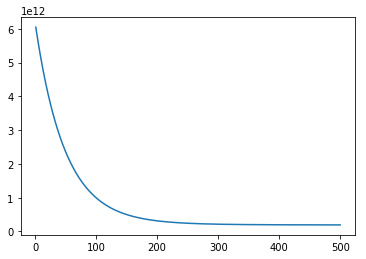

[[  3.38175984e+05]
 [  1.03032124e+05]
 [ -2.02325233e+02]]


In [29]:
theta = gradientDescent(x,y,np.zeros([3,1]),0.01,500)
print(theta)

In [30]:
scaled_x = (np.array([1,1650,3]) - mean_x)/(std_x)
scaled_x[np.isnan(scaled_x)] = 1
predict_y = np.dot(scaled_x,theta)
print(predict_y)

[ 292264.88188682]


/Users/nishant/venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [31]:
theta = np.dot(np.dot(inv(np.dot(x.T,x)),x.T),y)
predict_y = np.dot(scaled_x,theta)
print(predict_y)

[ 293081.4643349]
